# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [82]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
stopwords = stopwords.words('english')

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [83]:
# 1. Load the 20-newsgroups.csv data into a dataframe.

df = pd.read_csv('data/20-newsgroups.csv')
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [52]:
# 2. Print the shape
print(df.shape)

(11314, 4)


In [53]:
# 3. Inspect / remove nulls and duplicates
print('isnull :')
print(df.isnull().sum())
print('\n')
print('duplicated : ')
print(df.duplicated().sum())
# no need for df.dropna()

isnull :
id                0
message           0
topic             0
topic_category    0
dtype: int64


duplicated : 
0


In [54]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [84]:
# 1. Make a function that makes all text lowercase.
def convert_to_lowercase(temp_string):
    return temp_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
convert_to_lowercase(test_string)



'this is a sentence with lots of caps.'

In [85]:
# 2. Make a function that removes all punctuation. 

def remove_punctuation(temp_string):
    temp_string = re.sub(r'[^\w\s]', '', temp_string)
    return temp_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)


'This is a sentence 50 With lots of punctuation  other things'

In [86]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(temp_string):
    
    words = word_tokenize(temp_string)
    
    valid_words = []
    
    for word in words:
        
        if word not in stopwords:
            
            valid_words.append(word)
    
    temp_string = ' '.join(valid_words)
    
    return temp_string
    
test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [87]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

snow = nltk.stem.SnowballStemmer('english')

def stemmer(temp_string):
    
    snowball = SnowballStemmer('english')
    
    words = word_tokenize(temp_string)
    
    valid_words = []
    
    for word in words:
        
        stemmed_word = snowball.stem(word)
        
        valid_words.append(stemmed_word)
        
    temp_string = ' '.join(valid_words)
    
    return temp_string

test_string = 'I played and started playing with players and we all love to play with plays'
stemmer(test_string)


'i play and start play with player and we all love to play with play'

In [88]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def pipeline(input_str):
    input_str = convert_to_lowercase(input_str)
    input_str = remove_punctuation(input_str)
    input_str = remove_stopwords(input_str)
    return input_str

test_string = 'I played and started playing with players and we all love to play with plays'
print('Original String: ', test_string)
print("Modified String: ", pipeline(test_string))


Original String:  I played and started playing with players and we all love to play with plays
Modified String:  played started playing players love play plays


In [72]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [89]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message']
df['message_clean'] = df['message_clean'].apply(pipeline)

In [90]:
print("Testing to see if pipeline function was correctly applied: \n")
print("Original string: \n", df['message'][0])
print("Modified string: \n", df['message_clean'][0])

Testing to see if pipeline function was correctly applied: 

Original string: 
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Modified string: 
 lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sp

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [91]:
# 1. Define your `X` and `y` data.

X = df['message_clean'].values
y = df['topic_category'].values


In [92]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [93]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X)


TfidfVectorizer()

In [94]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [95]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape, type(X))
print("I have %i features currently in use." % X.shape[1])


(11314, 139767) <class 'scipy.sparse.csr.csr_matrix'>
I have only one feature/column currently in use.


In [96]:
X[0]

<1x139767 sparse matrix of type '<class 'numpy.float64'>'
	with 59 stored elements in Compressed Sparse Row format>

# Split your data into Training and Testing data. 

In [97]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 45)

In [81]:
#This was for myself to see what was inside the variables created above
print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 128939)	0.10669902848957359
  (0, 128824)	0.11790516394733397
  (0, 128823)	0.35371549184200196
  (0, 125263)	0.05721011678827412
  (0, 122801)	0.012229890653635316
  (0, 121193)	0.057513173833319525
  (0, 120070)	0.05950850055887337
  (0, 116352)	0.22589274002261342
  (0, 115675)	0.05905267547599475
  (0, 110617)	0.06030812455529101
  (0, 110609)	0.11294637001130671
  (0, 110607)	0.3028528064912594
  (0, 108859)	0.08478600610329882
  (0, 105283)	0.1006102811821184
  (0, 102848)	0.057734335206484556
  (0, 101874)	0.0563435564294486
  (0, 101852)	0.06981936638995498
  (0, 101844)	0.053799171119135236
  (0, 101241)	0.07357987064553843
  (0, 100921)	0.06408627019965808
  (0, 100108)	0.012728463666260785
  (0, 95636)	0.09951046185015569
  (0, 95634)	0.11790516394733397
  (0, 95621)	0.09662538008214158
  (0, 89415)	0.15302888219477423
  :	:
  (9049, 11096)	0.21769427113467404
  (9049, 8002)	0.12510370169598967
  (9049, 4968)	0.04803774036902937
  (9050, 131603)	0.26181628594285994
  (

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [113]:
# 1. Initalize an empty model. 
# I run this only if I wan a model with a preset alpha value, just like in the lecture

# model = MultinomialNB(alpha = 0.05)

In [98]:
# Fit our model with our training data.
# from sklearn.model_selection import GridSearchCV

params = {
    'alpha' : [0.004, 0.005, 0.006, 0.01, 0.03, 0.05, 0.08]
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'accuracy'
)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

{'alpha': 0.005}


In [142]:
# Same reason for the cell above 2 cell spaces, 
# run this with that line for a fixed alpha value

# model.fit(X_train, y_train)

In [101]:
model = grid_search_cv.best_estimator_

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [102]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)


In [103]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.911622


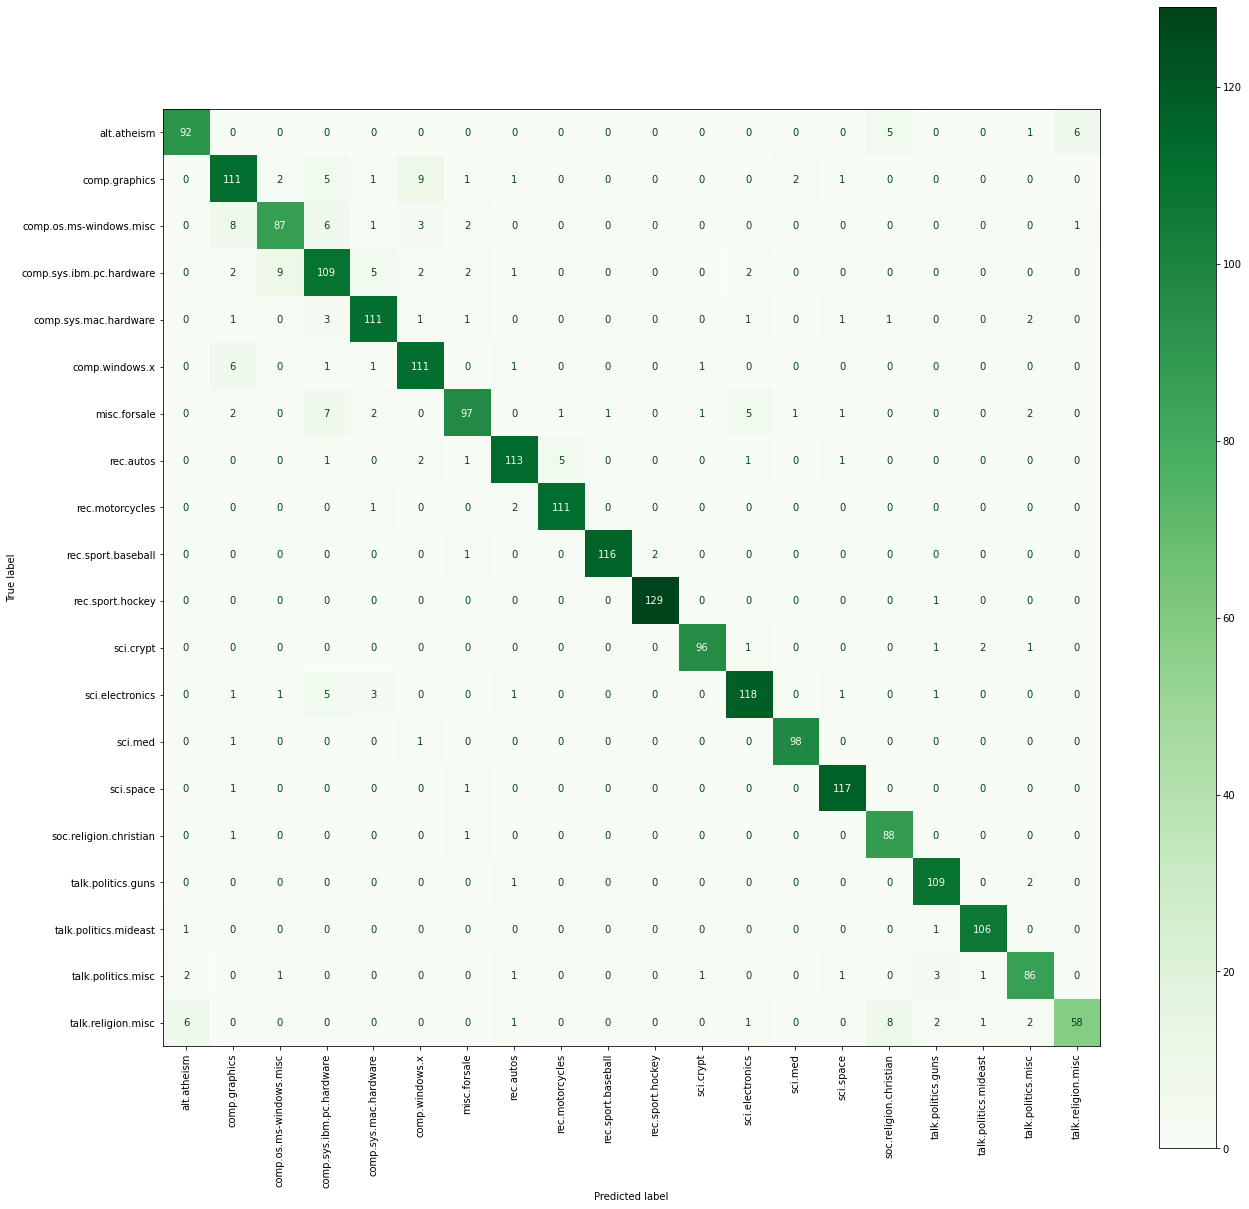

In [104]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize = (21, 21))
disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_,
                            cmap = plt.cm.Greens, ax = ax)

plt.xticks(rotation=90)
disp

In [105]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.91      0.88      0.90       104
           comp.graphics       0.83      0.83      0.83       133
 comp.os.ms-windows.misc       0.87      0.81      0.84       108
comp.sys.ibm.pc.hardware       0.80      0.83      0.81       132
   comp.sys.mac.hardware       0.89      0.91      0.90       122
          comp.windows.x       0.86      0.92      0.89       121
            misc.forsale       0.91      0.81      0.85       120
               rec.autos       0.93      0.91      0.92       124
         rec.motorcycles       0.95      0.97      0.96       114
      rec.sport.baseball       0.99      0.97      0.98       119
        rec.sport.hockey       0.98      0.99      0.99       130
               sci.crypt       0.97      0.95      0.96       101
         sci.electronics       0.91      0.90      0.91       131
                 sci.med       0.97      0.98      0.98       100
         

In [63]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

#I got this error because I used the 'topic' column instead of 'topic_category'
# and the former consists of int values while the latter is populated with string
# values. 
# classification_report 's target_names parameter only functions with
# lists that conist of strings. Granted, it would be fairly simple to convert integers
# strings, but i figure that actual terms in 'topic_category' would be more informative
# than some integers anyways. Leaving this here as a reference for myself

# tldr: DON'T RUN THIS CELL


# print(classification_report(y_test, y_pred, target_names = model.classes_))

TypeError: object of type 'int' has no len()

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [120]:
my_sentence = "Politics and guns. Politics and guns. Talk politics and guns"
# 1. Apply the text pipeline to your sentence
print('Original String: ', my_sentence)
print("\nModified String: ", pipeline(my_sentence))

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_sentence = pipeline(my_sentence)
new_sentence = new_sentence.split(' ')
print('\n')
print(new_sentence)
    
X = vectorizer.transform(new_sentence)
print('\n')
print(X.shape, type(X))

# 3. Use the model to predict your new `X`. 
model.predict(X)

# 4. Print the prediction
pred_proba = model.predict_proba(X)
print('\n')
for c, p in zip(model.classes_, pred_proba.round(3)[0]):
    print(c, p)

Original String:  Politics and guns. Politics and guns. Talk politics and guns

Modified String:  politics guns politics guns talk politics guns


['politics', 'guns', 'politics', 'guns', 'talk', 'politics', 'guns']


(7, 139767) <class 'scipy.sparse.csr.csr_matrix'>


alt.atheism 0.022
comp.graphics 0.001
comp.os.ms-windows.misc 0.001
comp.sys.ibm.pc.hardware 0.001
comp.sys.mac.hardware 0.001
comp.windows.x 0.001
misc.forsale 0.001
rec.autos 0.001
rec.motorcycles 0.152
rec.sport.baseball 0.033
rec.sport.hockey 0.001
sci.crypt 0.092
sci.electronics 0.001
sci.med 0.001
sci.space 0.083
soc.religion.christian 0.029
talk.politics.guns 0.051
talk.politics.mideast 0.358
talk.politics.misc 0.16
talk.religion.misc 0.007


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [242]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
stopwords = stopwords.words('english')

In [243]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.shape

(86460, 3)

In [244]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [245]:
# checking the data
print(df.isnull().sum())
print('\n')
print(df.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64


57


In [246]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [247]:
def convert_to_lowercase(temp_string):
    return temp_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
convert_to_lowercase(test_string)

def remove_punctuation(temp_string):
    temp_string = re.sub(r'[^\w\s]', '', temp_string)
    return temp_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

def remove_stopwords(temp_string):
    
    words = word_tokenize(temp_string)
    
    valid_words = []
    
    for word in words:
        
        if word not in stopwords:
            
            valid_words.append(word)
    
    temp_string = ' '.join(valid_words)
    
    return temp_string
    
test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

snow = nltk.stem.SnowballStemmer('english')

def stemmer(temp_string):
    
    snowball = SnowballStemmer('english')
    
    words = word_tokenize(temp_string)
    
    valid_words = []
    
    for word in words:
        
        stemmed_word = snowball.stem(word)
        
        valid_words.append(stemmed_word)
        
    temp_string = ' '.join(valid_words)
    
    return temp_string

test_string = 'I played and started playing with players and we all love to play with plays'
stemmer(test_string)

def pipeline(input_str):
    input_str = convert_to_lowercase(input_str)
    input_str = remove_punctuation(input_str)
    input_str = remove_stopwords(input_str)
    return input_str

test_string = 'I played and started playing with players and we all love to play with plays'
print('Original String: ', test_string)
print("Modified String: ", pipeline(test_string))

Original String:  I played and started playing with players and we all love to play with plays
Modified String:  played started playing players love play plays


In [248]:
df['Tweet_clean'] = df['Tweet'].apply(pipeline)

In [249]:
print("Checking to see if clean through pipeline worked:")
print("\nOriginal tweet: ", df["Tweet"][0])
print("\nModified Tweet: ", df["Tweet_clean"][0])

Checking to see if clean through pipeline worked:

Original tweet:  Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L

Modified Tweet:  today senate dems vote savetheinternet proud support similar netneutrality legislation house httpstcon3tggdlu1l


In [250]:
X = df['Tweet_clean'].values
y = df['Party'].values

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X.shape, type(X))
print("I have %i features currently in use." % X.shape[1])

(86403, 132962) <class 'scipy.sparse.csr.csr_matrix'>
I have 132962 features currently in use.


In [251]:
X[0]

<1x132962 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [252]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 45)

In [314]:
model = MultinomialNB(alpha = 0.05)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [316]:
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.809270


In [317]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.80      8460
  Republican       0.80      0.83      0.82      8821

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



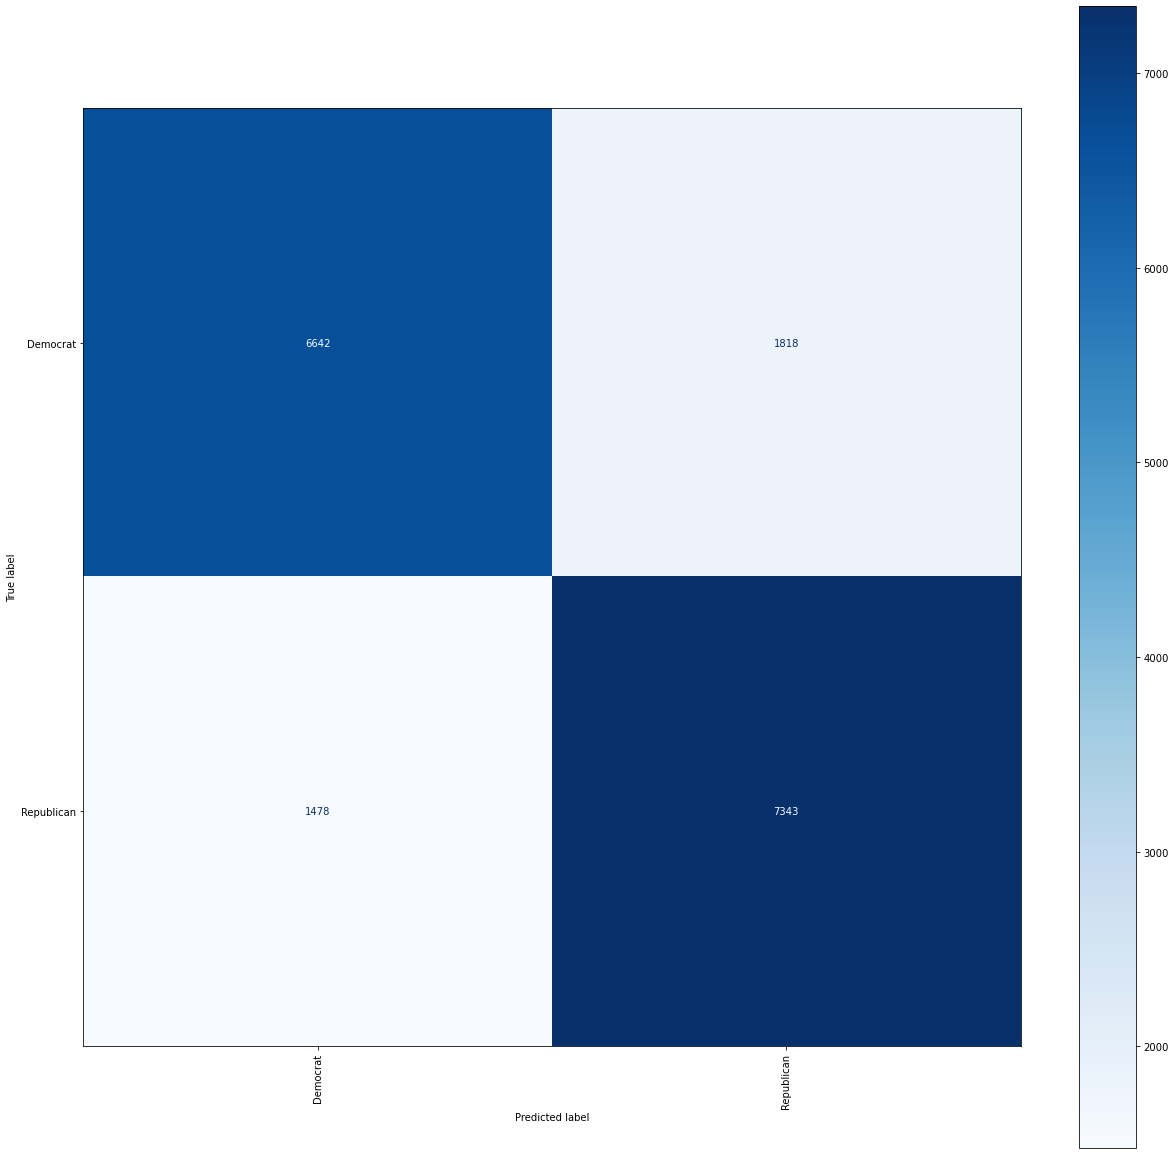

In [318]:
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [291]:
# Couldn't get these to work unfortunately, so I opted for the standard,
# fixed method of just fitting an new model instead of using the best from a gridsearch
# as shown above

# params = {
#     'alpha' : [0.004, 0.005, 0.006, 0.01, 0.03, 0.05, 0.08]

# }

# grid_search_cv = GridSearchCV(
#     estimator = MultinomialNB(),
#     param_grid = params,
#     scoring = 'f1' 
# )

In [289]:
# grid_search_cv.fit(X_train, y_train)
# print(grid_search_cv.best_params_)

C:\Users\drtrt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['Democrat', 'Republican'], dtype='<U10')

In [ ]:
# model = grid_search_cv.best_estimator_